In [6]:
import csv

data = {
    "Parameters": ["COD", "pH", "EC", "NTU", 
                   "F", "TSS", 
                   "TDS", "BOD", "DO", 
                   "Zn", "Cr", "Cd", 
                   "Pb", "Ni", "Oil"],
    "2014": [110, 7.14, 1682, 0.5, 0, 94, 1098, 38, 5.8, 0.08, 0.01, 0.001, 0.01, 0, 2.2],
    "2016": [108, 7.11, 1724, 0.7, 0.06, 88, 1118, 36, 5.9, 0.12, 0.03, 0, 0.04, 0, 2],
    "2017": [110, 7.2, 2017, 0.5, 0, 234, 1100, 37, 5.9, 1.0, 0.03, 0, 0, 0, 2.0],
    "2020": [24, 7.3, 1126, 27, 0.2, 310, 732, 36, 5.3, 0.01, 0.0025, 0.0005, 0.0049, 0.0035, 0.9]
}

with open("musi_river.csv", "w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Parameters", "2014", "2016", "2017", "2020"])
    for i in range(len(data["Parameters"])):
        row = [data["Parameters"][i]] + [data[year][i] for year in ["2014", "2016", "2017", "2020"]]
        writer.writerow(row)

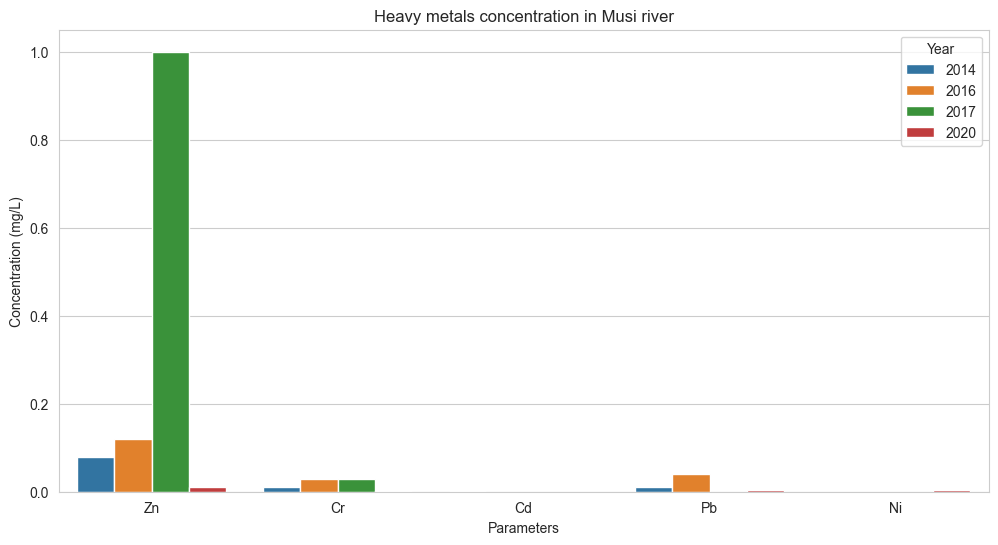

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("musi_river.csv")
metals_df = df.loc[df["Parameters"].isin(["Zn", "Cr", "Cd", "Pb", "Ni"])]
metals_df = metals_df.melt(id_vars=["Parameters"], var_name="Year", value_name="Concentration")
plt.figure(figsize=(12, 6))
sns.barplot(x="Parameters", y="Concentration", hue="Year", data=metals_df)
plt.ylabel("Concentration (mg/L)")
plt.title("Heavy metals concentration in Musi river")
plt.show()